# Process Extracted RI into Labels For Meshing.
Regularize Body Location and Pad The Space Accordingly

In [4]:
# Imports
import os
import numpy
import scipy as sp
import PIL as pl
from matplotlib import pyplot as plt

# I/O Allocation
Takes in extracted matrix.\
Output to Mesh Label

In [6]:
# Path Variables:
repo_path = "/Users/caozehuang/Documents/GitHub/Photon-Transport-Simulation/"     # Replace with repository path
export_address = "data/mesh_label/"
access_address = "data/extracted_ri/"         

# Helpers:
def output_address(subfolder="data/", repository=repo_path):
    out_path = f"{repository}{subfolder}"
    return out_path

def modified_output_address(file_name):
    name_part = file_name.split(".")[0]
    new_name = f"{name_part}_label.mat"         # Tag File Type
    return new_name

In [10]:
# Accessing the file:
file_name = "Test_extracted.mat"     # Replace with actual file name
access_path = f"{repo_path}{access_address}{file_name}"
print("Accessing: " + access_path)

# Open file:
print("Accessing")
content = sp.io.loadmat(access_path)
print(content.keys())

Accessing: /Users/caozehuang/Documents/GitHub/Photon-Transport-Simulation/data/extracted_ri/Test_extracted.mat
Accessing
dict_keys(['__header__', '__version__', '__globals__', 'masked_ri'])


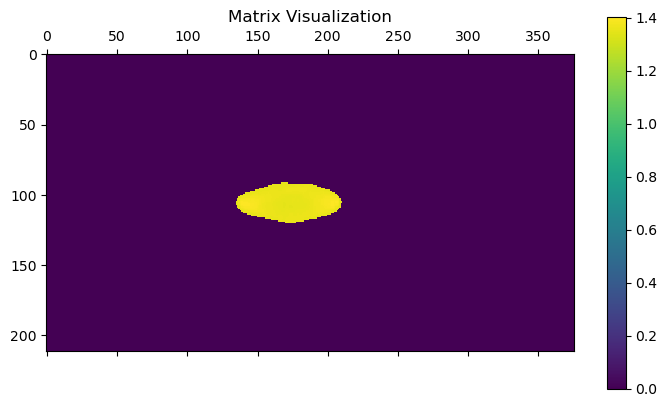

In [11]:
# Retrieve Matrix
extract = content['masked_ri']

# Verify
plt.matshow(extract) 
plt.colorbar() # Creates a colorbar for the plot
plt.title("Matrix Visualization")
plt.show() 

Enter image parameters:
- Pixel sizes
- Matrix dimension
- Unit

Here we can compute the size of each pixel.

In [ ]:
# Parameters:
width = 35.7014
depth = 212
unit = 'um' # unit of measurement
dimensions = [376, 212] # of (x,y) in pixels, 
pixel_size = 0  # size of one pixel in um




# Regularizing Geometry

In [ ]:
# Normalize spacing


# Padding

In [ ]:
# Padding RIs
air = 1.3
gel = 1.34

# Define gel air cut-off
cutoff = 0              # Defined Later

# Helper
def pad(input, air, gel, cutoff, depth):
    for i in cutoff:
        for j in input[i]:
            if input[i,j] == 0:
                input[i,j] = air
    gel_height = depth - cutoff
    for k in gel_height:
        for l in input[k + cutoff]:
            if input[k, l] == 0:
                input[k, l] = gel
    return input


In [ ]:
out_label = pad(extract, air, gel, cutoff, depth)
# Verify
plt.matshow(extract) 
plt.colorbar() # Creates a colorbar for the plot
plt.title("Matrix Visualization")
plt.show() 

Saving output file.

In [ ]:
# Save the extracted geometry as a .mat file:
# Export address and name:
output_path = output_address(export_address, repo_path)
output_name = modified_output_address(file_name=file_name)

# Save
try:
    sp.io.savemat(f"{output_path}{output_name}", {"masked_ri": out_label})
    print(f"Extracted RI matrix saved successfully at {output_path}{output_name}!")
except Exception as e:
    print(f"Error saving extracted RI matrix: {e}")
    raise
